In [50]:
#CHEME 465 AU 2020
#HW2

import numpy as np
import matplotlib.pyplot as plt

In [51]:
#Question 1
#Goal: determine the reaction order of a reaction for the synthesis of chemical X
#Irreversible reaction: A->X
#Reaction Environment: isothermal,  isobaric  batch  reactor

#Provided data:
time = np.arange(0,11) #unit: minutes
C_A  = np.array([1.337, 0.813, 0.571, 0.438, 0.363, 0.304, 0.267, 0.229, 0.207, 0.191, 0.173]) #unit: mol/L

Since the zero order plot is not linear, the assumption that the reaction order is zero order is wrong.
Since the first order plot is not linear, the assumption that the reaction order is first order is wrong.
Since the second order plot is pretty linear, the assumption that the reaction order is second order is correct.
The order of the reaction is 2.


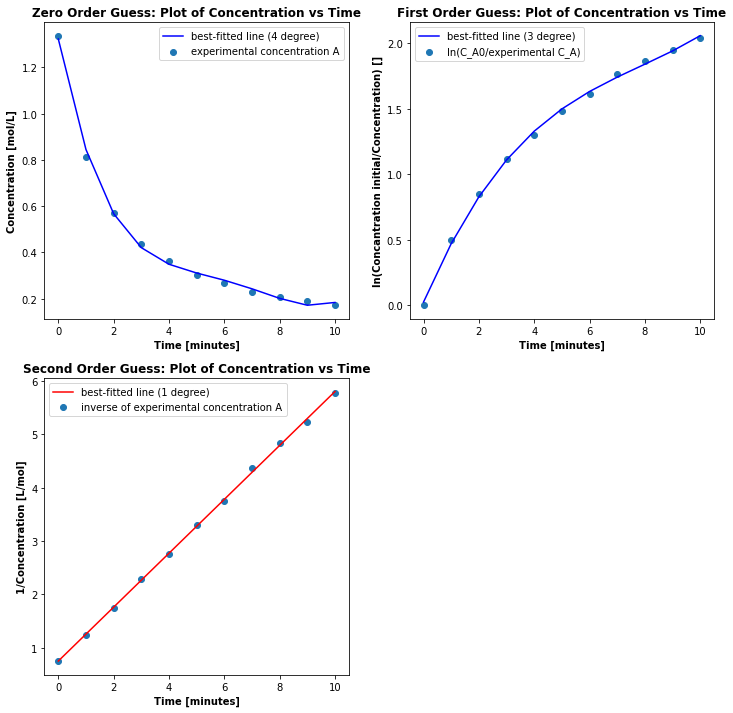

In [52]:
#Question 1 - Part a:

#Integral Method: According to the textbook, integral method is the technique 
#where we assume the order of the reaction plot the the appropriate function of concentration versus time
#If the plot turns out to be linear, our guess is correct.

fig = plt.figure(figsize=[12,12])
#Guess 1: zero order
plt.subplot(2, 2, 1)
plt.scatter(time, C_A, label ="experimental concentration A")
m0, b0, c0, d0, e0 = np.polyfit(time, C_A, 4) #Best-fitted line
plt.plot(time, m0*time**4+b0*time**3+c0*time**2+d0*time+e0, color = 'b', label ="best-fitted line (4 degree)")
plt.title("Zero Order Guess: Plot of Concentration vs Time", fontweight = 'bold') 
plt.xlabel("Time [minutes]", fontweight = 'bold', fontsize = 10) 
plt.ylabel("Concentration [mol/L]", fontweight = 'bold', fontsize = 10) 
print("Since the zero order plot is not linear, the assumption that the reaction order is zero order is wrong.")
plt.legend()

#Guess 2: first order
plt.subplot(2, 2, 2)
ln = np.log(C_A[0]/C_A)
plt.scatter(time, ln, label ="ln(C_A0/experimental C_A)")
m1, b1, c1, d1 = np.polyfit(time, ln, 3) #Best-fitted line
plt.plot(time, m1*time**3+b1*time**2+c1*time+d1, color = 'b', label ="best-fitted line (3 degree)")
plt.title("First Order Guess: Plot of Concentration vs Time", fontweight = 'bold') 
plt.xlabel("Time [minutes]", fontweight = 'bold', fontsize = 10) 
plt.ylabel("ln(Concantration initial/Concentration) []", fontweight = 'bold', fontsize = 10) 
print("Since the first order plot is not linear, the assumption that the reaction order is first order is wrong.")
plt.legend()

#Guess 3: second order
plt.subplot(2, 2, 3)
inv = (1/C_A)
plt.scatter(time, inv, label ="inverse of experimental concentration A")
m2, b2 = np.polyfit(time, inv, 1) #Best-fitted line
plt.plot(time, m2*time+b2, color = 'r', label ="best-fitted line (1 degree)")
plt.title("Second Order Guess: Plot of Concentration vs Time", fontweight = 'bold') 
plt.xlabel("Time [minutes]", fontweight = 'bold', fontsize = 10) 
plt.ylabel("1/Concentration [L/mol]", fontweight = 'bold', fontsize = 10)
print("Since the second order plot is pretty linear, the assumption that the reaction order is second order is correct.")
plt.legend()

#Conclusion:
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + color.UNDERLINE + 'The order of the reaction is 2.' + color.END)

In [53]:
#Question 1 - Part b:

#From part a, we have:
#1/C_A = 1/C_A0 + kt
#From the fitted line in part a, we have:
k = m2
print('The reaction rate constant for this process is: {:.5f} L/(mol*minute)'.format(k))

The reaction rate constant for this process is: 0.50528 L/(mol*minute)


In [54]:
#Question 1 - Part c:

#Reaction: 2A + B -> X
#The reaction follows an  elementary  rate  law:
#-r_A = -dC_A/dt = k*C_A^2*C_B

#Given:
k = 0.02  #unit: L^2/(mol^2*min)
C_B = ((-1/C_A[10])-(-1/C_A[0]))/(-k*(time[10]-time[0]))
print(color.BOLD + 'If C_B was held constant, the value of C_B is: {:.5f} mol/L'.format(C_B))

If C_B was held constant, the value of C_B is: 25.16202 mol/L


**Explation of above equation for $C_B$:**

$-r_A$ = $-dC_A/dt = kC_A^2C_B$

=> $\int_{1.337}^{0.173} \frac{1}{(C_A)^2} \,dC_A$ = $-\int_{0}^{10}kC_B\,dt$

=> $\left.\frac{-1}{C_A}\right|_{1.337}^{0.173}$ = $-\left.kC_Bt\right|_{0}^{10}$

=> $\frac{-1}{0.173} - \frac{-1}{1.337} = -0.02(C_B)(10-0)$


In [55]:
#Question 2:

#Reaction: A -> B
#Reaction Environment: isothermal, isobaric batch reactor

#Data:
cA = np.loadtxt('concentration_data.txt')
t = np.loadtxt('time_data.txt')


Since the data points in the independent variable are equally spaced, we can use the Numerical Method.
Difference between time data points: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5]
The reaction order alpha is: 3


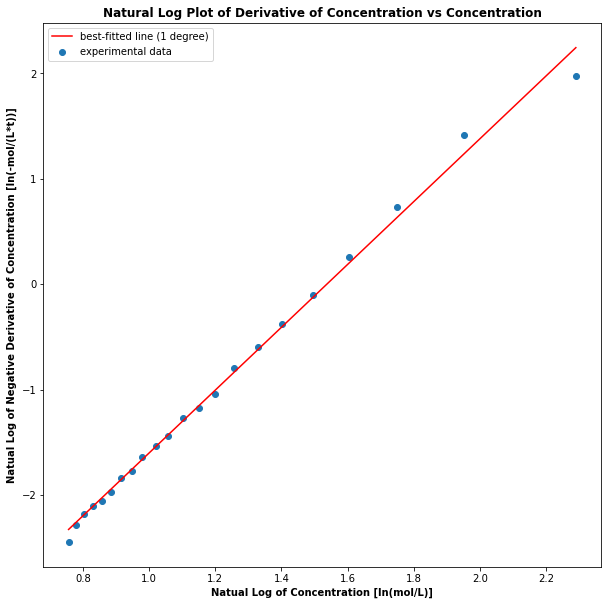

In [58]:
#Question 2 - Part a and c:

#Differential Method:
#ln(-dCA/dt) = ln(kA) + alpha * ln(CA)
#x-axis:
ln_CA = np.log(cA)

#Finding derivative of concentration A over time:
diff_CA       = np.diff(cA)
diff_time     = np.diff(t)
print('Since the data points in the independent variable are equally spaced, we can use the Numerical Method.\nDifference between time data points:', diff_time)
delta_t = diff_time[0]
ln_derivative = np.double(np.arange(0,22))
ln_derivative[0] = np.double(np.log(-((-3)*cA[0] +4*cA[1] - cA[2])/(2*delta_t)))
ln_derivative[21] = np.double(np.log(-((3)*cA[21] -4*cA[20] + cA[19])/(2*delta_t)))

for i in range(1,21):
  ln_derivative[i] = np.double(np.log(-(cA[i+1]-cA[i-1])))

#Plot Differential Method:
fig = plt.figure(figsize = [10,10])
plt.scatter(ln_CA, ln_derivative, label ='experimental data')
#from the scatter plot of Differential Method, we can find the alpha by using the best-fitted line:
m, b = np.polyfit(ln_CA, ln_derivative, 1) #Best-fitted line
plt.plot(ln_CA, m*ln_CA+b, color = 'r', label ="best-fitted line (1 degree)")
#The reaction order alpha is:
alpha = m
print(color.BOLD + 'The reaction order alpha is: {:.0f}'.format(alpha))

plt.title("Natural Log Plot of Derivative of Concentration vs Concentration", fontweight = 'bold') 
plt.xlabel("Natual Log of Concentration [ln(mol/L)]", fontweight = 'bold', fontsize = 10) 
plt.ylabel("Natual Log of Negative Derivative of Concentration [ln(-mol/(L*t))]", fontweight = 'bold', fontsize = 10) 
plt.legend()

In [57]:
#Question 2 - Part b:

#To find k, we choose a data point from cA, then find the derivative and calculate k:
#since our data is in natural log, we use equation 7-11 from textbook:
k = np.exp((m*ln_CA[10]+b)/(alpha*ln_CA[10]))
print(color.BOLD + 'The rate constant of reaction is: {:.5f} L^2/(mol^2*minute)'.format(k))

The rate constant of reaction is: 0.67378 L^2/(mol^2*minute)
